### Using MATPLOTLIB

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="white")

In [33]:
df = pd.read_clipboard()

In [34]:
df.head()

,A,B
0,0.00%,0.00%
1,0.18%,0.07%
2,0.22%,0.11%
3,0.30%,0.17%
4,0.35%,0.25%


In [35]:
data = df.applymap(lambda x:float(str(x).replace('%','')))

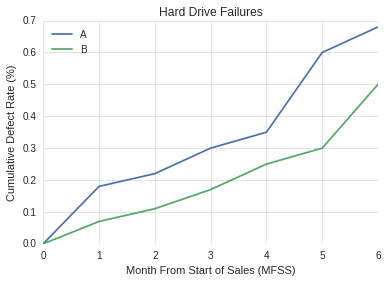

In [36]:
data.plot()
plt.title('Hard Drive Failures')
plt.xlabel('Month From Start of Sales (MFSS)')
plt.ylabel('Cumulative Defect Rate (%)')
plt.grid(True, alpha=0.5)
sns.despine(left=True, bottom=True)

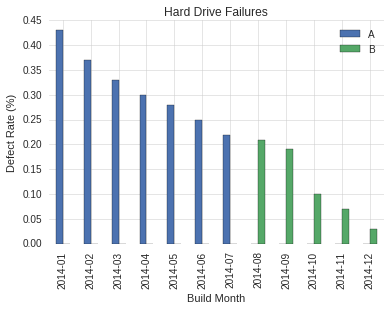

In [37]:
df = pd.read_clipboard(index_col=0)
data = df.applymap(lambda x:float(str(x).replace('%','')))
data.plot.bar()
plt.title('Hard Drive Failures')
plt.xlabel('Build Month')
plt.ylabel('Defect Rate (%)')
plt.grid(True, alpha=0.5)
sns.despine(left=True, bottom=True)

### Charts Using Plotly

In [1]:
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import numpy as np
import cufflinks as cf
init_notebook_mode()

df = pd.read_clipboard()

layout = dict(
    title = 'Hard Drive Failures',
    xaxis = dict(
        title='Months From Start of Sales'
    ),
    yaxis = dict(
        title='Cumulative Defect Rate (%)'
    ),
    width = 700,
    height = 550
)


iplot(df.iplot(asFigure=True, kind='line', layout=layout), show_link=False)

In [2]:
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import numpy as np
import cufflinks as cf
init_notebook_mode()

df = pd.read_clipboard(index_col=0)

layout = dict(
    title = 'Hard Drive Failures',
    xaxis = dict(
        title='Build Month'
    ),
    yaxis = dict(
        title='Defect Rate (%)'
    ),
    width = 700,
    height = 550
)


iplot(df.iplot(asFigure=True, kind='bar', layout=layout), show_link=False)

### State Choropleth Map Using Bokeh

In [3]:
from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.sampledata.us_states import data as states
import pandas as pd
from bokeh.models import HoverTool

def state_choropleth(df, title='State Choropleth'):
    """Create state choropleth map.  Arguments: df: dataframe, title: chart title"""
    try:
        del states["HI"]
        del states["AK"]
    except:
        pass

    state_xs = [states[code]["lons"] for code in sorted(states)]
    state_ys = [states[code]["lats"] for code in sorted(states)]

    colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

    # Let's make a template or "dummy" dataframe to ensure our input dataframe is in sync with the patches x and y data
    states_list = ['AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','IA','ID','IL','IN','KS','KY','LA',
    'MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC',
    'SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']

    zeros_list = [float(0) for value in range(49)]

    state_template = pd.DataFrame({'STATECD':states_list, 'value':zeros_list})

    # Get data from clipboard, if it is a string-like object, replace certain characters
    if df.VALUE.dtype == 'O':
        df.VALUE = df['VALUE'].str.replace('%','').replace('$','').replace(',','').astype(float)
        
    # Ensure dataframe is sorted by state code so that it is in sync with the patches x and y data
    df.sort_values(by='STATECD', inplace=True)
    df.query("~(STATECD in('AK','HI'))", inplace=True)
    df_final = pd.merge(state_template, df, how='left', on='STATECD')
    df_final.fillna(value=0.0, inplace=True)
    df_final.drop('value', axis='columns', inplace=True)

    state_colors = []
    for state in sorted(states):
        try:
            # get the value for the state
            rate = df_final[df_final.STATECD==state].VALUE.values[0]
            # Normalize the value by dividing it by the max value then multiply by the number of colors
            idx = int((rate/df_final.VALUE.max()) * (len(colors) - 1) )
            state_colors.append(colors[idx])
        except KeyError:
            state_colors.append("black")
            
    source = ColumnDataSource(df_final)

    TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save,resize"

    p = figure(title=title, toolbar_location="left",
               plot_width=900, plot_height=600, tools=TOOLS)

    p.patches(state_xs, state_ys, source=source, fill_color=state_colors, fill_alpha=0.9,
              line_color="#884444", line_width=2, line_alpha=0.3)

    hover = p.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [
        ("State", "@STATECD"),
        ("Value", "@VALUE"),
        ("(Long, Lat)", "($x, $y)")
    ]

    output_notebook()
    show(p)
    
clip = pd.read_clipboard()

state_choropleth(clip, 'Hard Drive Failures by State')

Loading BokehJS ...

### State Choropleth Map Using Plotly

In [4]:
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()

df = pd.read_clipboard()

df.VALUE = df.VALUE.str.replace('%','')
df.VALUE = df.VALUE.astype(float)

# Go here to choose other colors: http://colorbrewer2.org/  # of classes=6, sequential, rgb
scl = [[0.0, 'rgb(241,238,246)'],[0.2, 'rgb(212,185,218)'],[0.4, 'rgb(201,148,199)'],\
            [0.6, 'rgb(223,101,176)'],[0.8, 'rgb(221,28,119)'],[1.0, 'rgb(152,0,67)']]

df['text'] = "Defect %"

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['STATECD'],
        z = df['VALUE'].astype(float),  # Ensure it is a numeric type
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',  # white lines
                width = 2
            )
        ),
        colorbar = dict(
            title = "Defect %"
        )
    ) ]

layout = dict(
        title = 'Hard Drive Failures',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',  # white color lakes
        ),
        width=800,
        height=550
    )
   
fig = dict( data=data, layout=layout )

iplot(fig, show_link=False )

### Bar Charts Using Seaborn

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

df = pd.read_clipboard()
df.Perc_Of_Total = df.Perc_Of_Total.str.replace('%','').astype(float)
df.sort_values(by='Perc_Of_Total', ascending=False, inplace=True)
df.index = range(len(df))

In [7]:
df

,Complaint,Perc_Of_Total
0,Abnormal Noise,51.54
1,Missing,20.48
2,Scratched,15.74
3,Water Leak,12.24


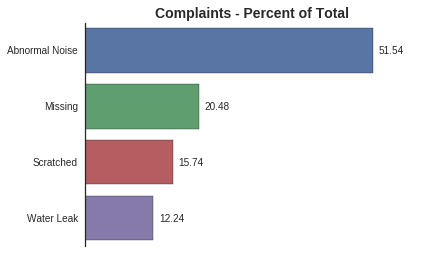

In [8]:
sns.barplot(x="Perc_Of_Total", y='Complaint', data=df )
plt.title("Complaints - Percent of Total", fontsize=14, weight='bold')
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
# Add values to the right of the bars
for p, value in zip(range(len(df)), df.Perc_Of_Total.values):
    plt.annotate(str(value), xy=(value + 1, p), va='center')
sns.despine(bottom=True)

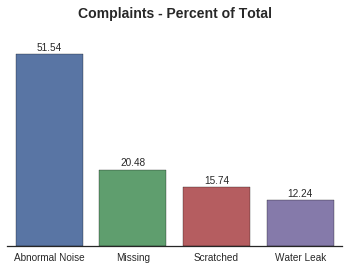

In [9]:
sns.barplot(x="Complaint", y='Perc_Of_Total', data=df, orient='v' )
plt.title("Complaints - Percent of Total", fontsize=14, weight='bold')
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
# Add values to the top of the bars
for p, value in zip(range(len(df)), df.Perc_Of_Total.values):
    plt.annotate(str(value), xy=(p, value + 1), ha='center')
sns.despine(left=True)

### Making Charts with Toyplot (not mature, but actively maintained)

In [10]:
import toyplot
import pandas as pd

In [11]:
df = pd.read_clipboard()
df = df.applymap(lambda x: float(str(x).replace('%','')))

In [12]:
toyplot.data.Table(df)

A,B
0.0,0.0
0.18,0.07
0.22,0.11
0.3,0.17
0.35,0.25
0.6,0.3
0.68,0.5


**According to their [documentation](http://toyplot.readthedocs.io/en/stable/labels-and-legends.html?highlight=legend), legend is currently experimental.  I find this strange since having a legend is very critical.  Couldn't find an example to create a legend for all my series in a dataframe.  But, I was able to eventually figure it out using a for loop.**

In [13]:
canvas = toyplot.Canvas(width=600, height=400)
axes = canvas.axes(label='Hard Drive Failures', xlabel="Months From Start Of Sales", 
                   ylabel="Cumulative Defect Rate (%)")

series = []
for column in df.columns:
    series.append(axes.plot(df[column].values, stroke_width=3))

legend_data = []
for i, column in enumerate(df.columns):
    legend_data.append((column, series[i]))
    
canvas.legend(legend_data,
    corner=("top-left", 50, 50, 50)
);

0 2 4 6 Months From Start Of Sales 0.0 0.2 0.5 0.8 Cumulative Defect Rate (%) Hard Drive Failures A B 
 
 
 Save as .csv

**Now, let's make a bar chart**

In [29]:
df = pd.read_clipboard(index_col=0)

In [30]:
df = df.applymap(lambda x: float(str(x).replace('%','')))

In [31]:
df

,A,B
BUILD_MTH,,
2014-01,0.43,NaN
2014-02,0.37,NaN
2014-03,0.33,NaN
2014-04,0.30,NaN
2014-05,0.28,NaN
2014-06,0.25,NaN
2014-07,0.22,NaN
2014-08,NaN,0.21
2014-09,NaN,0.19


In [32]:
canvas = toyplot.Canvas(width=600, height=450)
axes = canvas.axes(label='Hard Drive Failures', xlabel="Vehicle Build Month", 
                   ylabel="Defect Rate (%)", gutter=100)

series = []
for column in df.columns:
    series.append(axes.bars(df[column].values))

legend_data = []
for i, column in enumerate(df.columns):
    legend_data.append((column, series[i]))
    
canvas.legend(legend_data,
    corner=("top-right", 50, 50, 50)
)
    
axes.x.ticks.labels.angle = 90
axes.x.ticks.locator = toyplot.locator.Explicit(labels=df.index)
axes.x.label.style = {"baseline-shift":"-70px"}  # Shift x label downwards
axes.y.label.style = {"baseline-shift":"40px"}   # Shift y label more to the left

2014-01 2014-02 2014-03 2014-04 2014-05 2014-06 2014-07 2014-08 2014-09 2014-10 2014-11 2014-12 Vehicle Build Month 0.0 0.1 0.2 0.3 0.4 Defect Rate (%) Hard Drive Failures A B 
 
 
 Save as .csv